In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [277]:
cantidad_tiradas = 100
apuesta_inicial = 500
capital = 100000000

In [278]:
rojo = [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]

In [279]:
def fibonacci(listado_apuestas, is_win):
    """
    Implementa un sistema de apuestas basado en la estrategia de progresión Fibonacci.
    Si la apuesta es ganadora, se suma el valor de las ultmas dos apuestas.
    SI la apuesta es perdedora, se retrocede dos posiciones en el listado.

    Parameters:
    listado_apuestas (list): Lista que contiene los montos de las apuestas previas.
    is_win (bool): Indica si la última apuesta fue ganadora (True) o perdedora (False).

    Returns:
    int: El monto de la próxima apuesta según la estrategia Fibonacci.
    """
    global capital, apuesta_inicial
    ultima_apuesta = listado_apuestas[-1]
    if is_win:
        capital += ultima_apuesta
        proxima_apuesta = max(listado_apuestas[-2] if len(listado_apuestas) > 1 else ultima_apuesta, apuesta_inicial)
    else:
        capital -= ultima_apuesta
        proxima_apuesta = max(sum(listado_apuestas[-2:]) if len(listado_apuestas) > 1 else ultima_apuesta, apuesta_inicial)

    return proxima_apuesta

    

In [280]:
tiradas = np.random.randint(0,37,size=[cantidad_tiradas])

In [281]:
listado_apuestas = []
listado_capital = []
listado_wins = []

In [282]:
listado_apuestas.append(apuesta_inicial)
listado_capital.append(capital)
for index, tirada in enumerate(tiradas):
    
    is_win = tirada in rojo
    listado_wins.append(is_win)

    proxima_apuesta = fibonacci(listado_apuestas, is_win)

    if proxima_apuesta > capital: # banca rota
        break

    if len(listado_apuestas) == cantidad_tiradas:
        break

    listado_apuestas.append(proxima_apuesta)
    listado_capital.append(capital)


In [283]:
print(len(listado_apuestas))
print(len(listado_wins))
print(len(listado_capital))

56
56
56


In [284]:
df = pd.DataFrame({
    'apuesta': listado_apuestas,
    'win': listado_wins,
    'capital': listado_capital
})

df.head(100)

,apuesta,win,capital
0,500,True,100000000
1,500,False,100000500
2,1000,True,100000000
3,500,False,100001000
4,1500,False,100000500
5,2000,True,99999000
6,1500,False,100001000
7,3500,False,99999500
8,5000,False,99996000
9,8500,False,99991000


In [285]:
def grafico_flujo_caja(listado_capital):
    global cantidad_tiradas
    
    fig, ax = plt.subplots()

    ax.set_title(f"ESTRATEGIA FIBONACCI CAPITAL {listado_capital[0]}")
    ax.set_xlabel('n (número de tiradas)')
    ax.set_ylabel('cc (cantidad de capital)')

    ax.plot([i for i in range(1, len(listado_apuestas) + 1)], listado_capital, linewidth=2.0, label='fc (flujo de caja)')

    ax.axhline(listado_capital[0], color='r', linestyle='--', label='fci (flujo de caja inicial)')

    plt.legend()
    plt.show()

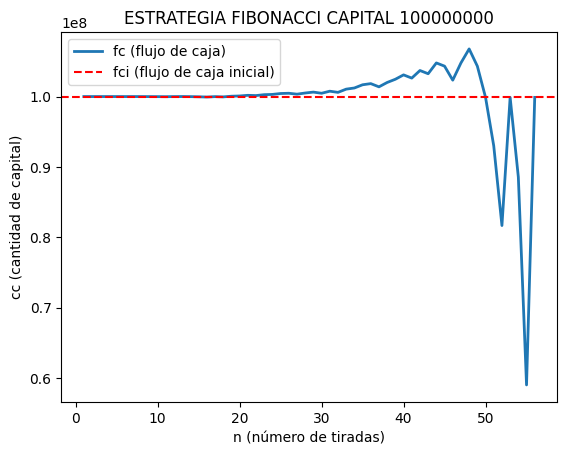

In [286]:
grafico_flujo_caja(listado_capital)

In [287]:
[i for i in range(cantidad_tiradas)]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [288]:
[i**2 for i in range(cantidad_tiradas)]

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801]